<a href="https://colab.research.google.com/github/ycw0363/stat_seminar/blob/main/R_practice_2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling (tidyr)

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [5]:
table4a # N. cases

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [6]:
table4b # N. population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


## pivot_longer() 

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [ ]:
table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [ ]:
table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [ ]:
tidy4a <- table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)


Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try ?right_join and study join methods

## Pivot_wider()

One observation might be scattered across multiple rows

In [ ]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separating and Uniting 

## separate()

One column contains two variables 

In [ ]:
table3 

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## unite()

Single variable is spread across multiple columns

In [ ]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [ ]:
table5 %>% 
  unite(new, century, year, sep = "")


country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


# Functional Programming

In [7]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [8]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] 0.004314439

[1] 0.4946503

[1] 0.3669279

[1] -0.1420856

Don't copy and paste multiple times  
You can iterate using for loops


In [9]:
output <- vector("double", ncol(df))  # 1. output
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1]  0.004314439  0.494650258  0.366927901 -0.142085609

In [ ]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1]  0.42390995  0.02690741 -0.08069307  0.04684442

In [ ]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n) 
    output[i] = i
  return(output)
} 

simple2 <- function(n) {
  output <- c()
  for(i in 1:n) 
    output = c(output, i)
  return(output)
} 


In [ ]:
simple1(3)

[1] 1 2 3

In [ ]:
simple2(3)

[1] 1 2 3

In [ ]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.231,100


## for_loops vs functional

Possible to wrap up for loops in a function


In [ ]:
col_mean <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] -0.084639104 -0.002400303 -0.030917685 -0.083247511

You can make function as a variable

In [ ]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1]  0.42390995  0.02690741 -0.08069307  0.04684442

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [ ]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] -0.97 0.586 -2.17 0.906 -0.997 ...
 $ b: num [1:10] 1.064 -1.168 -0.623 0.239 -1.17 ...
 $ c: num [1:10] -0.0722 -0.0892 0.4624 0.7497 0.983 ...
 $ d: num [1:10] 0.516 -0.508 0.301 -0.813 0.284 ...


In [ ]:
df %>% map_dbl(mean)

a            b            c            d 
-0.084639104 -0.002400303 -0.030917685 -0.083247511

In [10]:
df %>% map(mean)  
#dbl 적지 않으면 list형태의 답이 나옴 df자체가 list이기 때문문

$a
[1] -0.09025221

$b
[1] 0.5367331

$c
[1] 0.08410771

$d
[1] -0.2806514

In [11]:
df %>% map(~mean(.)) 
#똑같은 결과가 나옴 
#.안에 a벡터 b벡터 c, d 이런식으로 넣어진다고 생각
#여기서 format을 변경하고 싶다 하면 dbl같은거 붙이는거임임f %>% map(~mean(.)) 
#똑같은 결과가 나옴 
#.안에 a벡터 b벡터 c, d 이런식으로 넣어진다고 생각
#여기서 format을 변경하고 싶다 하면 dbl같은거 붙이는거임임

$a
[1] -0.09025221

$b
[1] 0.5367331

$c
[1] 0.08410771

$d
[1] -0.2806514

In [ ]:
df %>% map_dbl(median)

a           b           c           d 
 0.42390995  0.02690741 -0.08069307  0.04684442

In [12]:
mtcars
#보면 cyl 가 4 6 8 이런식으로 존재한다는 것을 알 수 있음.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [13]:
mtcars %>% 
  split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(function(df) lm(mpg ~ wt, data = df))

#map안에 function을 define해버리는 것
#아래 예시는 function먼저 만들고 map안에 넣는거


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)
# 어떻게 보면 위에보다 더 간단함
#애초에 list에서 시작한거라서 결과도 list로 나옴


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .))

#세번째 방법

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



## Extract Component

In [14]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% map(summary)

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl(~.$r.squared)


4         6         8 
0.5086326 0.4645102 0.4229655

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl('r.squared')

  #이런식으로 네임을 지정해도 똑같은 결과를 가질 수 있음
  


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

In [16]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

In [15]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it. 

Is it fater as well? 

In [18]:
n_len = 10

In [19]:
rep(10,n_len) %>% map(~rnorm(.))

[[1]]
 [1] -0.0412786 -1.1444967  0.4301489  1.0553477 -0.1348331  0.5116576
 [7] -0.9331858  0.7162463 -0.5020951  0.2072815

[[2]]
 [1]  0.3913556 -0.9949608 -0.5865559  0.6317512  0.5905166 -0.1668992
 [7]  0.3466297 -0.1713190  1.1302429 -1.4760214

[[3]]
 [1]  0.430660945 -0.004553276  0.274886637 -1.757024470  2.120308754
 [6] -0.492061519  1.063781350 -1.003640674 -1.353820520  1.792613296

[[4]]
 [1]  0.95776409 -0.39222777 -0.92570655 -1.17683815  0.48234232 -0.78690949
 [7]  0.02829363  1.41805272  1.52292962  1.32817030

[[5]]
 [1] -0.45373928 -1.33686800  1.67889730 -0.67945004 -0.37803738 -0.91149538
 [7]  0.14566721 -0.55820965  0.02037747  0.51200319

[[6]]
 [1] -1.0339010  0.2439914 -0.3467432 -0.3564215 -0.6468012  0.8010438
 [7]  0.2410042  1.2769977 -1.0786290 -0.8990575

[[7]]
 [1] -0.0784708  0.2262110 -0.3820079 -0.1052877 -0.1863056 -1.0082555
 [7]  1.3702032  0.6779769  1.0672998 -0.3673770

[[8]]
 [1] -1.8436085  0.2110649 -1.8899812  0.1644038 -0.4547752 -0.3084703
 [7]  0.3972692 -0.5509296  0.4994041 -0.6588463

[[9]]
 [1]  0.3330894  0.6133888 -0.4088813 -1.9253556 -1.7573656 -0.7629219
 [7] -0.3132478 -2.0861535  0.2760485  0.2315841

[[10]]
 [1] -0.4133306  0.5584923 -0.1545783  0.2489832 -1.1556699  0.6451746
 [7]  0.7000379  1.2282982  0.6654734 -0.7866973

In [ ]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1]  0.52743505 -0.90886269  1.03574372  0.22652611 -0.88963669  0.72808485
 [7]  0.07468877  0.93831708 -1.21445971  0.69366390

[[2]]
 [1] -0.8991981  1.3794527 -0.1630155 -0.8610476  1.3932738  1.8208133
 [7] -1.7513283  1.3299391 -2.1452046  1.9997852

[[3]]
 [1]  0.3140859  0.9923112 -0.1759633 -1.4956647 -0.5351259 -0.5675641
 [7]  1.6307535  0.1683051  1.9075010 -0.4206986

[[4]]
 [1] -0.6201247  1.6502121 -0.1464198  0.8662909  0.1941911 -0.9192513
 [7]  0.1374188  1.3628337  1.4666813 -1.4221725

[[5]]
 [1] -1.4378453 -0.1232300 -0.7473429  1.7292908 -1.8621292 -1.3026652
 [7] -0.4851520  0.7450059  2.5731727  0.2617644

[[6]]
 [1]  0.9918919  0.8194098  0.6537751  1.5731232  2.5049935 -0.8119337
 [7]  0.1107102  0.7552333 -1.4451167  0.9113512

[[7]]
 [1] -1.7480207 -0.4536697 -0.5805534 -0.2680587 -0.9421824  0.5934837
 [7]  0.1768781  0.8551443 -0.2033591  1.2810124

[[8]]
 [1] -0.9987953 -0.1471029  1.7755825 -0.5204478  1.3944090 -0.5084039
 [7] -0.9704586  1.9228476 -0.1769407 -2.2861610

[[9]]
 [1] -0.6937698 -0.1350995 -0.3956007  0.5873083  0.2357904  0.1712018
 [7]  0.5829747  1.2848006  1.3651692 -0.7767127

[[10]]
 [1] -0.32778981  0.38849485 -0.07921878  1.87462633 -0.95527718 -1.03441315
 [7] -1.18534636 -0.09218413 -1.07912081  1.97505778

In [20]:
lapply(rep(10,n_len), rnorm ) #세번째


[[1]]
 [1]  0.3456151  0.5424973  0.3936777  0.5652032  1.0754433 -0.3723994
 [7] -0.3385634  1.8486290 -0.1912606 -0.3579757

[[2]]
 [1]  0.7499713  0.8907610  1.7209122  0.8951146  0.3342159 -1.2351415
 [7] -1.2310411  0.2594908 -1.1357036 -1.4218220

[[3]]
 [1]  0.61407604  0.49582567  0.27728290  0.45767141  0.85243024  0.12025359
 [7] -0.51669690  0.11379887 -0.79741928  0.06570817

[[4]]
 [1]  1.1655172 -0.4960002  0.2689465  0.1323644  1.5239125 -0.4503231
 [7] -0.1527252 -0.7225317  0.2882996 -1.1766793

[[5]]
 [1]  0.7954999 -0.6150714  0.3809025 -1.3064057  0.1430231  0.6511690
 [7] -0.8108595 -1.3013820  0.1295121  0.2088999

[[6]]
 [1] -0.31149968 -0.53964306  0.08860002  0.33181075  0.30026983  0.72600162
 [7]  0.68540710  0.04929694  0.96843126  1.14838949

[[7]]
 [1] -0.52343262  1.47136181  1.66507667 -0.87459742 -0.15563195  0.28408539
 [7]  0.07983534 -1.09734183  0.07332635 -0.52799869

[[8]]
 [1]  0.098316774  0.440212368 -0.049652682  0.935390331 -0.130607128
 [6]  0.891412026  2.651030171  0.779576949 -0.009165134 -0.935389678

[[9]]
 [1]  0.3953499 -1.2655813  0.9001594  0.5349969 -0.2232911  2.5865865
 [7] -0.1071894  0.3973180 -1.2405586  0.8827757

[[10]]
 [1]  0.36056456 -0.88767722 -1.17364596  0.89980281  2.71000035 -0.09617606
 [7] -0.41218078 -0.96696792 -0.12226569  0.81409671

In [21]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(~rnorm(.))
}

In [22]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [23]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [24]:
gen1(5)

[[1]]
 [1]  0.33396324  1.59051900  1.00965798 -0.62085936 -0.12366503 -1.96853370
 [7]  0.92080739 -2.33445311  0.99475892 -0.00276481

[[2]]
 [1]  1.1856002  1.2202728 -0.5867873 -0.6177522  2.3340751 -0.5046649
 [7]  0.0742396 -1.5314602 -1.2913328  1.1093162

[[3]]
 [1]  0.26472764 -1.40152537  0.95757881  0.55242385  0.28200291 -0.40186176
 [7] -1.19357640 -0.03864676 -1.28862077  0.18830168

[[4]]
 [1] -0.64433191  1.04342104 -0.19546437 -0.71442626  0.18984631  0.26074061
 [7]  0.81729115  0.02283377  0.10621978 -0.26842216

[[5]]
 [1]  0.2811157 -1.3205807  0.8337262  0.9535235 -3.5282073  0.1389951
 [7] -1.2382499 -0.1215960  0.7189028 -0.9335736

In [ ]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.577,100
2,fc2,0.405,100
3,fc3,0.423,100


# Something useful

In [ ]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


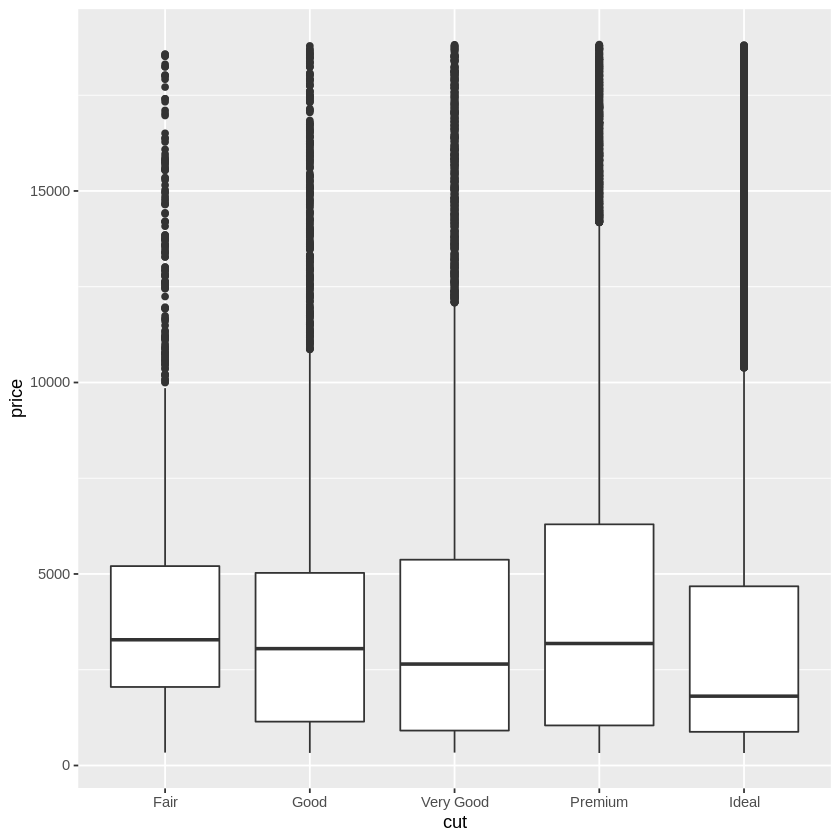

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

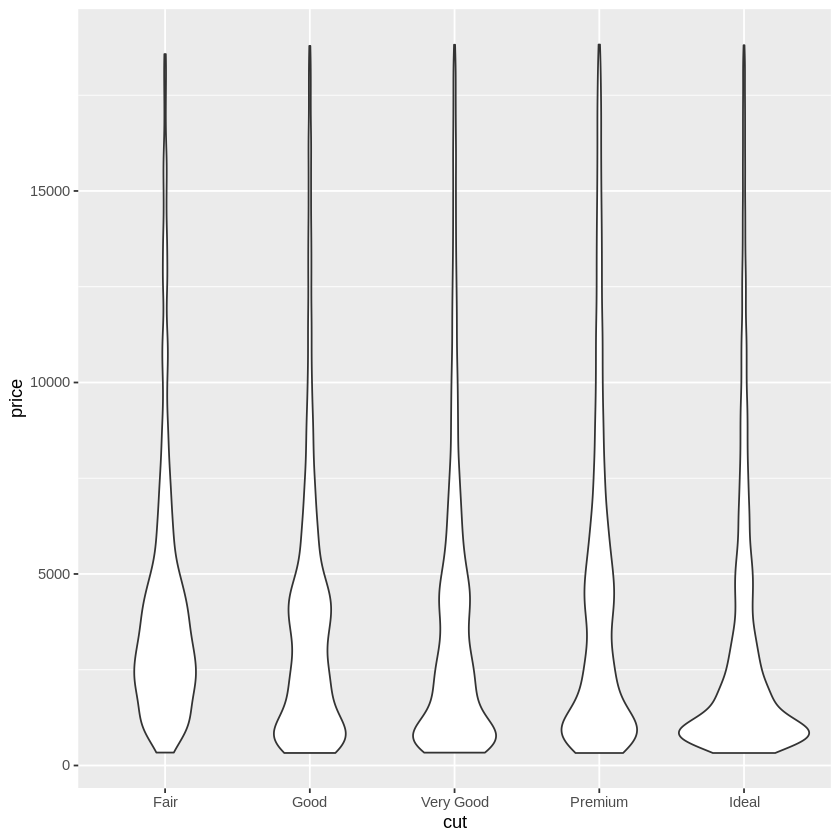

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()